# Dataset Overview
The Wine Quality Data Set was obtained from the UCI Machine Learning Repository, on the 28th of October 2021 at 2:37 pm. It consists of two datasets, representing the red and white variants of the Portuguese Vinho Verde wine. In this work, only the White Wine dataset will be used. The records were collected from May 2004 to February 2007 by the CVRVV which is an official certification entity with the goal of improving the quality and marketing of Vinho Verde. (Cortez et al. 2009) The wines were assessed by physicochemical and sensory tests. The physiochemical variables are fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, density, pH, sulphates, alcohol. Sensory data is based on at least three human experts who graded quality on a scale from 0 (very bad) to 10 (excellent), the final value is the median of these ratings. This dataset is larger than other publicly available, for example, the Wine Data Set from the UCI repository consist only of 178 instances and was donated over 30 years ago. Other studies have focused mostly on predicting the geographic wine origin or correctly classifying the wine. (Sun, Danzer and Thiel 1997), (Legin et al. 2003) Therefore in the field of predicting the quality of a wine is still much room for improvement. 

# Objectives
This dataset will be used to build a model to predict the wine quality as a whole number on a scale from 0 (very bad) to 10 (excellent). Quality evaluation currently relies fully on human experts, which can be an expensive process. Therefore, this work will explore the use of machine learning techniques to predict the quality based on the physicochemical data. 

# Peer-Reviewed paper

## Selection of important features and predicting wine quality using machine learning techniques (Gupta 2018)
This paper aims to determine the dependence of various variables on the output. Additionally, it compares the results of prediction when using selected features to all the features in the dataset. The experiments were performed on both red and white wine datasets from the UCI Wine Quality Data Set. The paper points out that the data needs pre-processing because of the large amplitude of variables, it proposes a linear transformation. It does not say if or how it handles the class imbalance. 

To determine the importance of each feature on the output value, a linear regression model was used. The results for the Red Wine dataset were presented in a form of a table. It shows that the quality of the wine is 35.61% dependent on all input features. When the value is less than 50%, the paper indicates that one or more of the input features are not essential for the output value. The paper concludes that features like volatile acidity, chlorides, free sulfur dioxide, total sulfur dioxide, pH, sulphates and alcohol are crucial in predicting the quality of red wine, as their p-value is less than 0.05. The results for the white wine dataset were presented similarly. The quality was 28.02% dependent on all predictors as a whole. The important predictors were fixed acidity, volatile acidity, residual sugar, free sulfur dioxide, density, pH, sulphates and alcohol with a p-value less than 0.05. 

To predict wine quality, two machine learning techniques were used - the neural network and support vector machine. In both techniques, two models were trained. One was using all the input values, while the second only the selected values. 
In the Red Wine dataset, the results of NN were presented in 2 tables. The first table shows 10 random samples with their original value and predicted value, using both models. The second table shows the overall training error, test error, and validation error. The results of selecting were closer to the original, with a test error of 0.146024 compared to the all features test error of 0.195660. 
The results of SVM were presented only by the table including 10 random samples. The paper claims that SVM gives more accurate predictions for selected features than all features, but it does not present the overall accuracy of these models. 
The results for the White Wine dataset were presented in a similar way. The test error of NN using selected features was 0.207456, which was less than for all features 0.241568. The paper concludes that SVM is a better machine learning technique for this task. However, it does not show the overall summary, but only 10 samples. It is worth noting that wine quality values are whole numbers 0 – 10, so it can be interpreted as 11 classes. The prediction techniques were using a regression approach. The justification for it could be that the selected or all features comparison would be more noticeable in this approach. 



# Data Exploration 

## Import dataset 

The first step in data exploration is to read the data into a Data Frame on which we can work later. The library Pandas was used for this task. The separator in the 'CSV' file is a semicolon. Additionally in the code below, other libraries were imported which will help in exploring the data.


In [1]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# read the file
df = pd.read_csv('data/winequality-white.csv', header=0, sep=';')


## Quick data exploration 

It is always a good idea to see a few rows of the loaded file, to have a rough idea of the data and see if the data was read correctly. 

In [2]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [3]:
# dataset size
print(f'The dataset has {df.shape[0]} rows, and {df.shape[1]} columns')

The dataset has 4898 rows, and 12 columns


The dataset has 4898 records, each record consist of 11 input features (fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, density, pH, sulphates, alcohol) and one target variable (quality). 

## Missing values

In [4]:
# look for missing values 
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

As said in the dataset description it does not contain any missing values. 

## Data types

In [5]:
# display data type of variables 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


The code above displays the data type for each variable in the table. Every input feature is a floating-point number and the quality (target value) is an integer. The dataset does not contain any categorical variables. 

## Class Distribution 

In [6]:
# count how many times each value occurs 
df['quality'].value_counts()

6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64

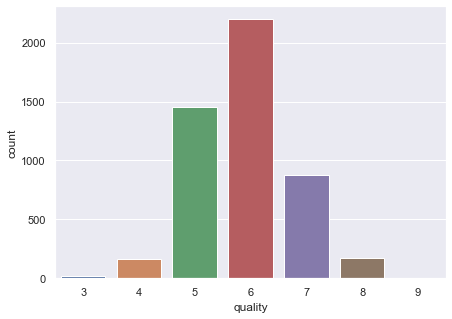

In [7]:
# create class distribution diagram 
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(7,5)})
sns.countplot(x="quality", data=df)
plt.show()

The description said that the quality values were graded on a scale from 0 (very bad) to  10 (excellent), it also points out that there are many more normal wines than excellent or poor ones. This diagram above together with the code that counts how many times each value is occurring, clearly states that there are very little to no records for wines that are very bad or excellent. The data is imbalanced. For example, there are only 5 samples with the quality of a 9 and 20 samples of a 3. This means that without any changes to the dataset it will be hard if not impossible to train the model for those cases. 

In [8]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


The table above shows the mean value, std (standard deviation), minimum, maximum value and 25%, 50%, 75% of each value in the dataset. It allows seeing if there are anomalies in the dataset, for example, if a pH value is beyond the pH scale (0-14) or if the alcohol content is unusually low or high for a wine.

The row 25% represents that quarter of all values are lower than the 25% value. For a better understanding of the quantiles look at the code below.


In [9]:
# number of rows of wines in the dataset with alcohol < 9.5
n = df[df.alcohol < 9.5].shape[0]

# print the percentage of those
print ('Percentage of wines with the alcohol less than 9.5 is',round(n/df.shape[0],2)*100,'%')

Percentage of wines with the alcohol less than 9.5 is 25.0 %


For a better visual understanding of the data, a histogram for each input feature was created.

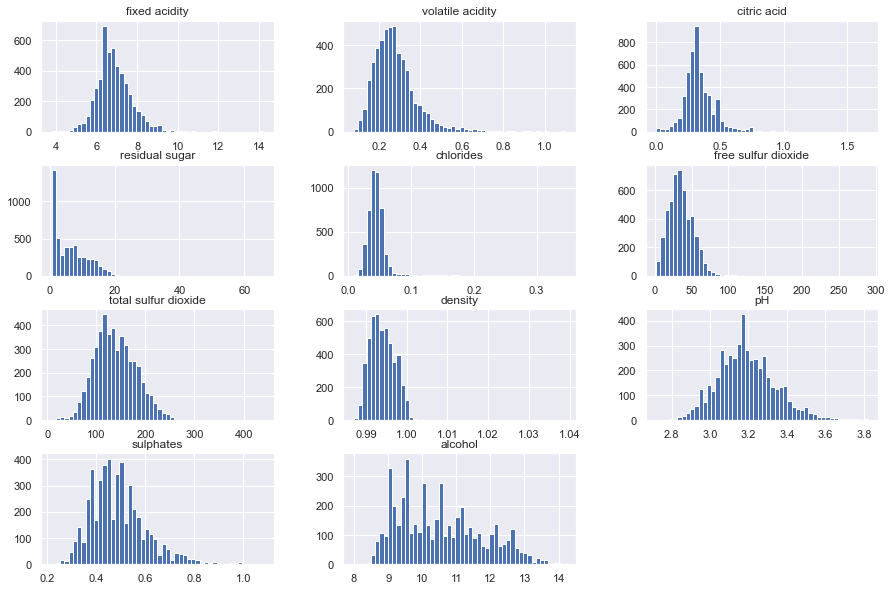

In [10]:
input_values = ["fixed acidity","volatile acidity","citric acid","residual sugar","chlorides","free sulfur dioxide","total sulfur dioxide","density","pH","sulphates","alcohol"]
df[input_values].hist(bins=50,figsize=(15,10))
plt.show()


The diagrams for the suplhate or volatile acidity are on a scale from 0.0 to around 1.0 when for the total sulfur dioxide or free sulfur dioxide the scale goes from 0 to 300 or 400 units. This difference suggests that the data may need feature scaling before training a model.

# Data Pre-processing 

## Split the data

Splitting the data into input features (X) and output features (y) will help in further processing the data. 

In [11]:
# store all rows and columns apart from last column(quality) in X
X = df.iloc[:,:(df.shape[1]-1)]
y = df['quality']

In [12]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
dtypes: float64(11)
memory usage: 421.0 KB


The code above is checking that the quality column is not included in the input features (X) 

## Normalising the data 

In [13]:
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9


As it was discovered in the data exploration part, the input features are of very different scales. For better performance of Machine Learning algorithms, it is good practice to normalise the data. In this case, using a Min-Max Approach, it rescales all values into a range between 0 and 1. The formula can be expressed as: $$ x_{scaled} = \frac{x - x_{min}}{x_{max} - x_{min}} \\ $$

In [14]:
def normalise(x):
    return (x - min(x))/(max(x)-min(x))

# X normalised 
X_n = X.copy(deep=True) 
X_n = X_n.apply(lambda x: normalise(x))


In the code above I make a deep copy of the input values, a deep copy is used because any modification of the data will not be reflected in the original. Then the normalise function was applied to every value in the data frame. The normalised data frame can be seen in the table below. As said before, the minimum of all input values is now 0.0 and the maximum 1.0. 

In [15]:
X_n.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,0.293730,0.194354,0.201320,0.088825,0.109117,0.116056,0.300141,0.133360,0.425697,0.313775,0.405527
std,0.081141,0.098818,0.072903,0.077792,0.064831,0.059258,0.098603,0.057662,0.137273,0.132704,0.198487
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.240385,0.127451,0.162651,0.016871,0.080119,0.073171,0.229698,0.088924,0.336364,0.220930,0.241935
50%,0.288462,0.176471,0.192771,0.070552,0.100890,0.111498,0.290023,0.127820,0.418182,0.290698,0.387097
75%,0.336538,0.235294,0.234940,0.142638,0.121662,0.153310,0.366589,0.173318,0.509091,0.383721,0.548387
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Test and Training data
To prevent aritificial data points in the testing dataset, the data will be split before sampling. It allow to objectively evaluate the model. The whole data is split into 25% test and 75% train data. 

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_n, y, test_size=0.25, random_state = 42)

Checking the size of the train and test data.

In [17]:
print(f'The size of the Training dataset is {X_train.shape[0]}')
print(f'The size of the Test dataset is {X_test.shape[0]}')

The size of the Training dataset is 3673
The size of the Test dataset is 1225


## Sampling 

As discussed in the class distribution section, the data is imbalanced and training with this data could lead to a biased model. Therefore, to address this issue a sampling technique could be used. There are many options, one of them is undersampling. Which would delete data samples until the classes were evenly distributed. Unfortunately, it comes with a high cost of lost data and a dataset of 4898 records along with many output classes suggest it is not the best approach. 
On the other hand, is oversampling, which generates new data samples. Random oversampling duplicates randomly data samples which will close the gap in the class distribution, but it will cause overfitting. (Yap et al. 2013) Another method is SMOTE (Synthetic Minority Oversampling) which generates completely new synthetic data using a neighbourhood-based technique  (Chawla et al. 2002). It has been proven that other sampling methods could achieve a better result, (Gosain and Sardana 2017) (Elyan, Moreno-Garcia and Jayne 2020), but having in mind the scale of this work the SMOTE method will probably produce an acceptable result. However, it is still prone to overfitting, especially when oversampling a small number of samples. Therefore when improving the solution it is worth considering enhancing this approach. 

In [18]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


The code above will download the necessary packages if they are not already installed on the machine. 

In [19]:
# code based on https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42, k_neighbors=4)
X_train_s, y_train_s = smote.fit_resample(X_train, y_train)

The code creates a SMOTE object with random_state=42, it determines the seed for the random number generator, and k_neighbors=4 which indicates the number of nearest neighbours to used to construct synthetic samples. When considering the quality of 9, which has only 5 samples the maximum k_neighbors value is 4. Afterwards, it creates the new resampled dataset. The code below presents the number of samples before and after oversampling. 

In [20]:
y_train.value_counts()

6    1654
5    1099
7     639
8     132
4     131
3      13
9       5
Name: quality, dtype: int64

In [21]:
y_train_s.value_counts()

8    1654
9    1654
3    1654
4    1654
5    1654
6    1654
7    1654
Name: quality, dtype: int64

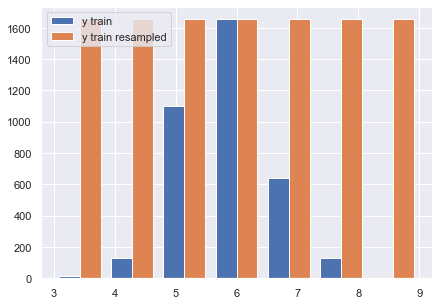

In [22]:
# based on https://stackoverflow.com/a/39481709/
plt.hist([y_train, y_train_s], bins=7, label=['y train', 'y train resampled'])
plt.legend(loc='upper left')
plt.show()

The diagram above visually presents the number of samples before and after oversampling.

# Modeling / Classification 

Random Forest Classifier was chosen as the classification model. Studies on this dataset chose NN and SVM (Cortez et al. 2009), others enhance these models by using only selected features for classification. (Gupta 2018) However, studies suggest that Random Forest has excellent classification accuracy and significant superiority when training samples are limited. (Han et al. 2017) Furthermore, a study compared 179 classifiers from 17 families using 121 data sets from the UCI repository and concluded that Random Forest is most likely to be the best classifier family. (Fernandez-Delgado et al. 2014)

## Builing a Random Forest Classifier model 

In [23]:
import pprint
from sklearn.ensemble import RandomForestClassifier

# create an instance of RandomForestClassifier using the defaul parameter 
rf = RandomForestClassifier()

print('The parameters of this Random Forest Classifier model are:')
# pprint is here used for better looking output 
pprint.pprint(rf.get_params())


# fit the model on training data
# the data was split already before
rf.fit(X_train_s, y_train_s)


The parameters of this Random Forest Classifier model are:
{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


RandomForestClassifier()

## Testing and evaluating the model

### Training error

In [24]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

# Predict values for the training set
rf_predictions = rf.predict(X_train_s)

accuracy = accuracy_score(y_train_s, rf_predictions)


print(f'Random Forest Model Accuracy on the Train Data is {np.round(accuracy*100,2)}%')

Random Forest Model Accuracy on the Train Data is 100.0%


The model is 100% accurate on the Train data. It is not a surprise, one of the reason is that 'max_depth' is set to 'none' which mean the node can expand until all leaves are pure or until all leaves contain less than min_samples_split samples which in this case is '2'. ("Sklearn.Ensemble.Randomforestclassifier" 2021) It suggests that the model overfits the data and could be improved in the Solution Improvement section.

### Testing error

In [25]:
# Predict values for the test set
rf_predictions = rf.predict(X_test)

# calculate the accuracy for the test data
accuracy = accuracy_score(y_test, rf_predictions)

print(f'Random Forest Model Accuracy on the Test Data is {np.round(accuracy*100,2)}%')

# ignore UndefinedMetricWarning
import warnings
warnings.filterwarnings("ignore")

print(classification_report(y_test, rf_predictions))

Random Forest Model Accuracy on the Test Data is 63.76%
              precision    recall  f1-score   support

           3       0.17      0.14      0.15         7
           4       0.30      0.44      0.35        32
           5       0.67      0.71      0.69       358
           6       0.70      0.62      0.65       544
           7       0.60      0.65      0.62       241
           8       0.42      0.49      0.45        43
           9       0.00      0.00      0.00         0

    accuracy                           0.64      1225
   macro avg       0.41      0.43      0.42      1225
weighted avg       0.65      0.64      0.64      1225



The classification report shows the main classification metrics per class label. The Precision shows us a fraction of how many of the predicted values are correct and the Recall represents a fraction of how many values were predicted correctly. F1-score is a combination of Precision and Recall. Support represents the number of occurrences for each class in the test dataset. Precision, Recall, F1-score can be calculated using the following formulas: (TP - True Positive, FP - False Positive, FN - False Negative)

$$ precission = \frac{TP}{TP - FP} \\ $$
$$ recall = \frac{TP}{TP - FN} \\ $$
$$ F1 = 2 * \frac{precission * recall}{precission + recall} \\ $$


The classification report suggests that the model performs best on classifying the "5", "6", "7" values. These are also the most represented classes in the dataset.

In [26]:
# a few function for easier presenting data 


def display_heatmap(actual, predicted):
    # display formated heatmap
    labels = sorted_unique_y_values()
    sns.heatmap(confusion_matrix(actual,predicted),annot=True,fmt="d",  xticklabels=labels, yticklabels=labels).set(xlabel='Predicted', ylabel='Actual')
    

def sorted_unique_y_values():
    #get unique class values 
    labels = y.unique()
    labels_s = np.sort(labels)
    return labels_s

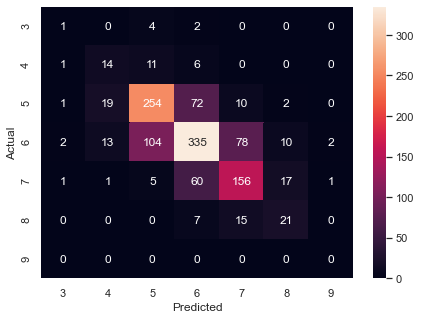

In [27]:
# display a confusion matrix in a form of a heatmap 
display_heatmap(y_test,rf_predictions)

The heatmap above compares the actual values with the predicted. We can see that the predicted class is most of the time correct or not far off on the quality scale. (±1) 

In [28]:
# create a table with Actual value, Predicted Value and isCorrect

# store actual class labels and predicted ones in a dataframe
results = pd.DataFrame({'Actual':y_test,'Predicted':rf_predictions})

# lets compare predictions against actual class labels
check_predictions = np.where(results['Actual'] == results['Predicted'], True, False)

results['isCorrect'] = check_predictions
results.head()

,Actual,Predicted,isCorrect
4656,7,7,True
3659,8,8,True
907,8,7,False
4352,5,5,True
3271,7,7,True


In [29]:
# group by features only correctly classified examples
correct_insts = pd.DataFrame(results[results.isCorrect==True].groupby(['Actual'])['isCorrect'].count()).reset_index()
# change headers
correct_insts.columns = ['Quality','Count']
# show dataframe
correct_insts


,Quality,Count
0,3,1
1,4,14
2,5,254
3,6,335
4,7,156
5,8,21


The table above represents how many times each class was predicted correctly. 

In [30]:
# group by features only incorrectly classified examples
incorrect_insts = pd.DataFrame(results[results.isCorrect!=True].groupby(['Actual'])['isCorrect'].count()).reset_index()
# change headers
incorrect_insts.columns = ['Quality','Count']
# show dataframe
incorrect_insts


,Quality,Count
0,3,6
1,4,18
2,5,104
3,6,209
4,7,85
5,8,22


The table above represents how many times each class was predicted incorrectly. 


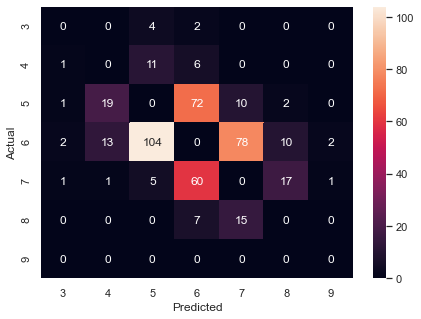

In [31]:
# display a confusion matrix in a form of a heatmap only for false identified values

false_predicted_true_value = results[results.isCorrect!=True].Actual
false_predicted_predicted_value = results[results.isCorrect!=True].Predicted

display_heatmap(false_predicted_true_value, false_predicted_predicted_value)


Considering the nature of the problem, which is wine quality, we need to say that a bigger mistake is to classify a wine with the quality of 7, as a 3 than a 6. Therefore, alongside the usual Accuracy, a Small Error Acceptance Accuracy can be calculated in which a misclassification by 1 on the quality scale will not count as an error.

$$ Small Error Acceptance Accuracy =  \frac{correct + incorrectByOne}{total} \\ $$

In [32]:
total = results.shape[0]
correct = results[results.isCorrect==True].shape[0]
incorrect = results[results.isCorrect!=True]

incorrect_by_one = 0

# ittarate through all the data frame
# count how many times the model was wrong by one 
for index, row in incorrect.iterrows():
    difference = abs(row.Actual - row.Predicted)
    if difference == 1:
        incorrect_by_one = incorrect_by_one + 1
        

new_accuracy = (correct + incorrect_by_one) / total


print(f'Random Forest Model small error acceptance accuracy on the Test Data is {np.round(new_accuracy*100,2)}%')

Random Forest Model small error acceptance accuracy on the Test Data is 94.53%


In [33]:
print(f'In {incorrect_by_one} cases of a total of {total} test cases the model is close to classify correctly.')

In 377 cases of a total of 1225 test cases the model is close to classify correctly.


# Solution Improvement 

## Creating and Evaluating Different Models

In [34]:
# libraries for the various models
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC


# Instantiate the classfiers and make a list
classifiers =[DecisionTreeClassifier(max_depth=25, random_state=15),
                SVC(kernel='rbf', random_state=15),
                RandomForestClassifier(n_estimators=100,random_state=15)]


In [35]:
# Train the models and show the classification report
for cls in classifiers:
# fit the data
    model = cls.fit(X_train_s, y_train_s)
    #get predictions
    predictions=cls.predict(X_test)
    
    accuracy = accuracy_score(y_test, predictions)
    
    print(f'{cls.__class__.__name__} Model Accuracy on the Test Data is {np.round(accuracy*100,2)}%')
    print(classification_report(y_test, predictions))


DecisionTreeClassifier Model Accuracy on the Test Data is 56.9%
              precision    recall  f1-score   support

           3       0.06      0.14      0.08         7
           4       0.16      0.31      0.21        32
           5       0.62      0.61      0.62       358
           6       0.66      0.55      0.60       544
           7       0.59      0.58      0.58       241
           8       0.27      0.60      0.37        43
           9       0.00      0.00      0.00         0

    accuracy                           0.57      1225
   macro avg       0.34      0.40      0.35      1225
weighted avg       0.60      0.57      0.58      1225

SVC Model Accuracy on the Test Data is 40.65%
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         7
           4       0.15      0.62      0.24        32
           5       0.54      0.54      0.54       358
           6       0.62      0.30      0.41       544
           7       0.3

The Random Forest Classifier gives the most accurate result in this comparison. Different kernels for the SVC were used, 'rbf' predicted the most accurate of all the kernels. In the Decision Tree Classifier, increasing the max_depth parameter over 25 does not result in better accuracy. 

## Build Random Forest Model with hyperparameters

The code below presents the final iteration of tuning the parameters for the Random Forest Classifier, throughout the process the parameters were carefully tuned based on the results. Previously GridSearchCV was used, which made a model for every combination of these parameters. However, the limited computing power available made this process very time-consuming. RandomizedSearchCV made this process more time-efficient, it allows to specify the number of candidates.

In [36]:
# Number of trees in random forest
n_estimators = [100, 105, 110]
# Number of features to consider at every split
max_features = ['sqrt', 'log2']
# Maximum number of levels in tree
max_depth = [28, 32, 36]
max_depth.append("none")
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 7]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1,2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the param grid
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(param_grid)

{'n_estimators': [100, 105, 110], 'max_features': ['sqrt', 'log2'], 'max_depth': [28, 32, 36, 'none'], 'min_samples_split': [2, 5, 7], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [37]:
from sklearn.model_selection import RandomizedSearchCV

random_forest =  RandomForestClassifier()
# create a Randomized Search CV where:
# n_iter = 30 - number of seetings combinations, it is keeped at a relative low number to save time, but at the cost of the quality
# cv = 3 - creates 3 folds for cross validation 
# verbose = 2 - for displaying messanges 
# n_jobs = -2 - use all logical processors available except one
rf_random_grid = RandomizedSearchCV(estimator = random_forest, param_distributions = param_grid, n_iter=30, cv = 3, verbose=2, n_jobs = -2, random_state=42)


In [38]:
rf_random_grid.fit(X_train_s, y_train_s)

Fitting 3 folds for each of 30 candidates, totalling 90 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=30,
                   n_jobs=-2,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [28, 32, 36, 'none'],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 7],
                                        'n_estimators': [100, 105, 110]},
                   random_state=42, verbose=2)

In [39]:
rf_random_grid.best_params_

{'n_estimators': 110,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 32,
 'bootstrap': False}

In [40]:
print (f'Train Accuracy - : {np.round(rf_random_grid.score(X_train,y_train)*100,2)}%')
print (f'Test Accuracy - : {np.round(rf_random_grid.score(X_test,y_test)*100,2)}%')

Train Accuracy - : 99.97%
Test Accuracy - : 64.9%


In [41]:
rf_predictions = rf_random_grid.predict(X_test)

accuracy = accuracy_score(y_test, rf_predictions)

print(f'The overall accuracy of RF is {np.round(accuracy*100,2)}%') 
print(classification_report(y_test, rf_predictions))

The overall accuracy of RF is 64.9%
              precision    recall  f1-score   support

           3       0.17      0.14      0.15         7
           4       0.33      0.38      0.35        32
           5       0.67      0.69      0.68       358
           6       0.68      0.65      0.67       544
           7       0.64      0.66      0.65       241
           8       0.50      0.47      0.48        43
           9       0.00      0.00      0.00         0

    accuracy                           0.65      1225
   macro avg       0.43      0.43      0.43      1225
weighted avg       0.65      0.65      0.65      1225



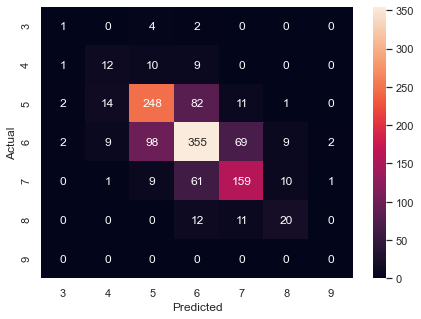

In [42]:
# display a confusion matrix in a form of a heatmap 
display_heatmap(y_test,rf_predictions)

The values in the heatmap above indicate that the trained model is classifying most of the sample correctly or not far off.

In [43]:
# create a table with Actual value, Predicted Value and isCorrect
# store actual class labels and predicted ones in a dataframe
results = pd.DataFrame({'Actual':y_test,'Predicted':rf_predictions})

# lets compare predictions against actual class labels
check_predictions = np.where(results['Actual'] == results['Predicted'], True, False)

results['isCorrect'] = check_predictions


In [44]:
total = results.shape[0]
correct = results[results.isCorrect==True].shape[0]
incorrect = results[results.isCorrect!=True]

incorrect_by_one = 0

# itarate through all incorrect
# count how many times the model was wrong by one 
for index, row in incorrect.iterrows():
    difference = abs(row.Actual - row.Predicted)
    if difference == 1:
        incorrect_by_one = incorrect_by_one + 1
        

new_accuracy = (correct + incorrect_by_one) / total

print(f'Random Forest Model small error acceptance accuracy on the Test Data is {np.round(new_accuracy*100,2)}%')

Random Forest Model small error acceptance accuracy on the Test Data is 93.96%


In [45]:
print(f'In {incorrect_by_one} cases of total {total} test cases the model is close to classify correctly.')

In 356 cases of total 1225 test cases the model is close to classify correctly.


The Random Forest Classifier with specified hyperparameters performs slightly better than with the default settings. Unfortunately, the model still misclassifies around a third of the test data, which is not ideal, however most of the time only by one class. The numbers suggest that the model still overfits the data, all the attempts to reduce overfitting failed because in this process the test accuracy was significantly reduced. It could be explained by the noise in the data, we need to remember that a lot of data was oversampled. Therefore a better sampling method could be used, which was discussed in the Sampling section. 

# References
CHAWLA, N. et al., 2002. SMOTE: Synthetic Minority Over-sampling Technique. Journal of Artificial Intelligence Research, 16, pp. 321-357.

CORTEZ, P. et al., 2009. Modeling wine preferences by data mining from physicochemical properties. Decision Support Systems, 47(4), pp. 547-553.

ELYAN, E., MORENO-GARCIA, C. and JAYNE, C., 2020. CDSMOTE: class decomposition and synthetic minority class oversampling technique for imbalanced-data classification. Neural Computing and Applications, 33(7), pp. 2839-2851.

FERNANDEZ-DELGADO, M. et al., 2014. Do we need hundreds of classifiers to solve real world classification problems?. Journal of Machine Learning Research, 15(1), pp. 3133-3181.

GOSAIN, A. and SARDANA, S., 2017. Handling class imbalance problem using oversampling techniques: A review. 2017 International Conference on Advances in Computing, Communications and Informatics (ICACCI).

GUPTA, Y., 2018. Selection of important features and predicting wine quality using machine learning techniques. Procedia Computer Science, 125, pp. 305-312.

HAN, T. et al., 2017. Comparison of random forest, artificial neural networks and support vector machine for intelligent diagnosis of rotating machinery. Transactions of the Institute of Measurement and Control, 40(8), pp. 2681-2693.

LEGIN, A. et al., 2003. Evaluation of Italian wine by the electronic tongue: recognition, quantitative analysis and correlation with human sensory perception. Analytica Chimica Acta, 484(1), pp. 33-44.

sklearn.ensemble.RandomForestClassifier, 2021. [online]. Available from: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html [Accessed 13 December 2021].

SUN, L., DANZER, K. and THIEL, G., 1997. Classification of wine samples by means of artificial neural networks and discrimination analytical methods. Fresenius' Journal of Analytical Chemistry, 359(2), pp. 143-149.

YAP, B. et al., 2013. An Application of Oversampling, Undersampling, Bagging and Boosting in Handling Imbalanced Datasets. Lecture Notes in Electrical Engineering, pp. 13-22.


